In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp,arange
from scipy.optimize import curve_fit
from scipy.fftpack import ifft,irfft, fftfreq
from itertools import combinations
import scipy.optimize as op
from past.builtins import xrange
from scipy.optimize import fsolve
from scipy.interpolate import UnivariateSpline

In [43]:
coor_p_1 = np.load('Images/p_1.npy')

In [44]:
coor_p_1

array([[-0.01877347, -1.07168945],
       [-0.02813235, -1.07008761],
       [-0.03128911, -1.06956052],
       ...,
       [ 0.00625782, -1.07529849],
       [-0.00625782, -1.07360608],
       [-0.01877347, -1.07168945]])

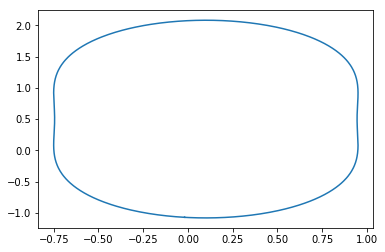

In [59]:
xCrit = coor_p_1[:,0]
yCrit = coor_p_1[:,1]
plt.plot(xCrit,yCrit)
#plt.gca().set_aspect('equal')

In [61]:
x1=[]
x2=[]
for x,y in zip(xCrit,yCrit):
    theta=np.arctan(x/y)
    r=(x**2+y**2)**0.5
    x1.append(x-0.1)
    x2.append(y-0.5)

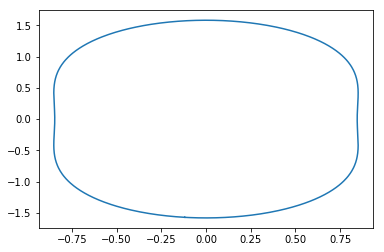

In [63]:
plt.plot(x1,x2)
#plt.gca().set_aspect('equal')

In [69]:
x1=np.asanyarray(x1)
x2=np.asanyarray(x2)
dx12dx22 = x1**2.+x2**2
dx1 = x1/dx12dx22
dx2 = x2/dx12dx22
alpha=np.array((dx1,dx2))
x = np.array((x1-x2))
beta=x - alpha

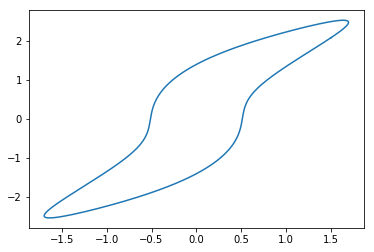

In [73]:
plt.plot(beta[0], beta[1])

In [188]:
import warnings
warnings.filterwarnings("ignore")

In [196]:
def FFT(xs,ys, add_zeros='False'):
    
    '''
    It returns the FT of the ys values. 
    '''
    
    dt= xs[1]-xs[0]
    
    if add_zeros=='True':
        
        N_zeros = 1000
        t_tail = np.linspace(xs[-1]+dt, xs[-1]+dt*N_zeros, N_zeros)
        t_head = np.linspace(xs[0]-N_zeros*dt, xs[0]-dt, N_zeros)
        t_final = np.concatenate([t_head, xs, t_tail])
        Ftd_final = np.concatenate([np.zeros(N_zeros), ys, np.zeros(N_zeros)])
        N = len(t_final)
    else:
        N=len(xs)
        t_final=xs
        Ftd_final=ys
        
    # 4. FFT
    ## note: Ftd_final is real, so first half of the FFT series gives usable information
    ##      you can either remove the second half of ifft results, or use a dedicated function ihfft   
    Fw=np.fft.ihfft(Ftd_final) # I can add parameter n with value higher tan len(Ftd_final) and it will automatically create a padding of zeros
    ## multiply back what is divided
    Fw *= N
    ## multiply sampling interval to transfer sum to integral
    Fw *= dt
    freq = np.fft.rfftfreq(N,d=dt)
    omega = freq*2.*np.pi
    
    return omega[1:],Fw[1:]


def FT_clas(freq,T,mu, xs, ys):
    
    '''
    semi-calssical analytical contribution, eq. 34 and 39 -- Ulmer's paper 

    '''   
    if mu<0:
        #saddle point
        return 1j*np.exp(1j*freq*T)*np.sqrt(-mu)

    else:
        #min/max point
        return -1*np.exp(1j*freq*T)*np.sqrt(mu)
    

def Fd_w(xs,ys,t_ori,Ft_ori):
    
    '''
    eq. 5.6  
    
    Note that t_final and Ftd_final may contain zeros and the beginning and the end that's why we 
    use xs and ys on the last equation.
    '''
    
    omega,Fw=FFT(xs,ys)    
    Fw = Fw*omega/(2j*np.pi)-Ft_ori[0]*np.exp(1j*omega*t_ori[0])/2/np.pi
    
    return omega,Fw


In [190]:
muI = np.load('muI.npy')
tauI = np.load('tauI.npy')
Ftd = np.load('Ftd.npy')
Ft_list= np.load('Ft_list.npy')
tau_list= np.load('tau_list.npy')

In [191]:
t_new = np.load('t_new.npy')
Ft_new = np.load('Ft_new.npy')

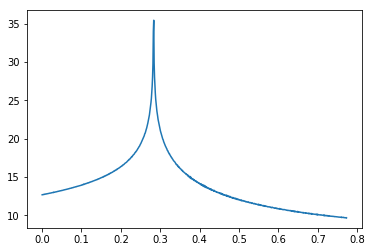

In [180]:
plt.plot(tau_list, Ft_list)

In [181]:
t_smooth, Ftd_smooth=fit_Func(tau_list,Ftd,'ftd')

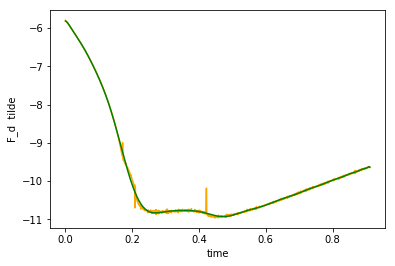

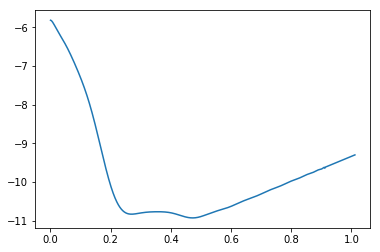

In [48]:
plt.plot(tau_list, Ftd, color='orange')
plt.plot(xs, ys, color='green')
plt.xlabel('time')
plt.ylabel('F_d  tilde')
plt.show()

xs_extended,ys_extended=extend_Fc(xs,ys)
plt.plot(xs_extended,ys_extended)
plt.show()

Using the functions decleared and with the data from the fitted curve we get the diffraction contribution. This explodes in 0. In order to find the error we manually calculate the integral for the FFT.

Using the Euler's formula we divide the contribution of the complex exponential in the FFT. We see that the integral is highly oscillating.

Text(0.5, 1.0, 'Real contribution')

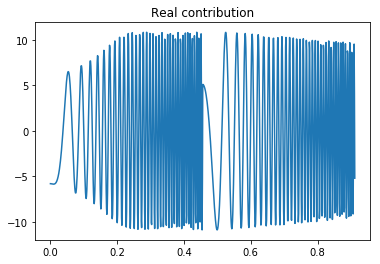

In [50]:
plt.plot(xs,np.cos(omega*xs)*ys)
plt.title('Real contribution')

Text(0.5, 1.0, 'Imaginary contribution')

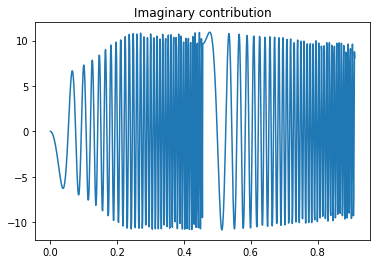

In [51]:
plt.plot(xs,np.sin(omega*xs)*ys)
plt.title('Imaginary contribution')

In [52]:
with open('Re_FT_levin.txt', 'r') as f:
    Re_FT_levin = f.read().splitlines()
    
with open('Im_FT_levin.txt', 'r') as f:
    Im_FT_levin = f.read().splitlines()

omega = fftfreq(len(ys),xs[1]-xs[0])
FT=ifft(ys)

In [53]:
with open('Cos_FT_levin.txt', 'r') as f:
    Cos_FT_levin = f.read().splitlines()
    
with open('Sin_FT_levin.txt', 'r') as f:
    Sin_FT_levin = f.read().splitlines()

Cos_FT_levin=np.asarray([complex(i) for i in Cos_FT_levin])
Sin_FT_levin=np.asarray([1j*complex(i) for i in Sin_FT_levin])

In [54]:
FT_levin=Cos_FT_levin+Sin_FT_levin

Text(0.5, 1.0, 'Python FT')

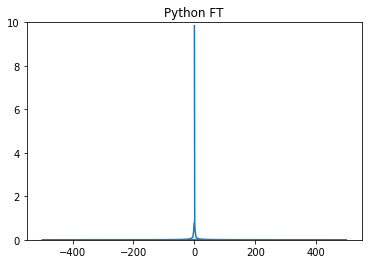

In [55]:
plt.plot(omega, np.abs(FT))
plt.ylim(0,10)
plt.title('Python FT')

Text(0.5, 1.0, 'Mathematica FT')

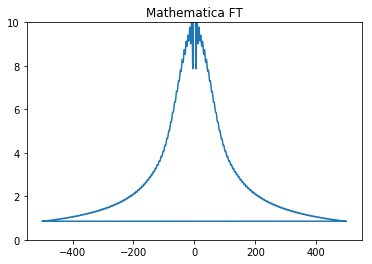

In [56]:
plt.plot(omega,np.abs(FT_levin))
plt.ylim(0,10)
plt.title('Mathematica FT')

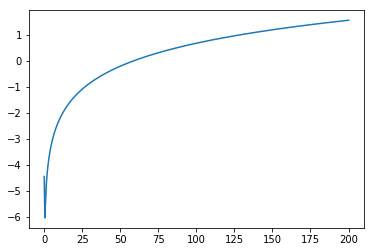

In [192]:
plt.plot(t_new, Ft_new)

In [193]:
mask=t_new>2


In [197]:
from scipy.signal import get_window

window = get_window('hamming', len(t_new))


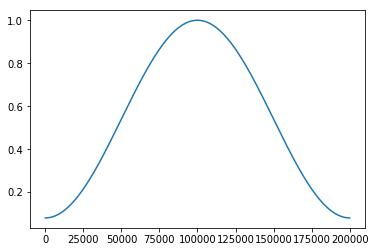

In [198]:
plt.plot(window)

### Without window function

In [206]:
w,F_diff=Fd_w(t_new,Ft_new,tau_list,Ftd)

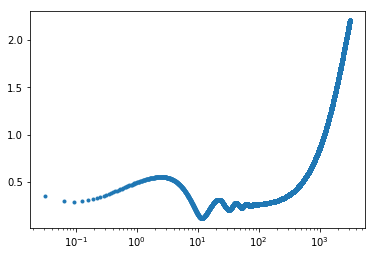

In [205]:
plt.plot(w, np.abs(F_diff), '.',label='F diffraction')
plt.xscale('log') 

### With window function

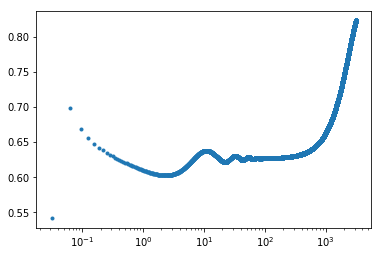

In [207]:
w,F_diff=Fd_w(t_new,Ft_new*window,tau_list,Ftd)
plt.plot(w, np.abs(F_diff), '.',label='F diffraction')
plt.xscale('log') 

In [132]:
from pylab import *
mask=t_new>2
signal=Ft_new[mask]+randn(len(t_new[mask]))*0.01

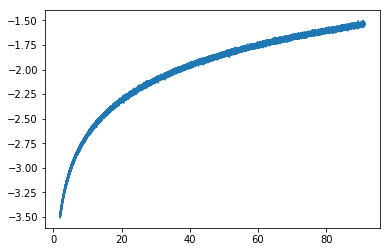

In [133]:
plt.plot(t_new[mask], signal)

In [174]:
#https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html

#https://flothesof.github.io/FFT-window-properties-frequency-analysis.html

window_len=100
#s=np.r_[signal[window_len-1:0:-1],signal,signal[-2:-window_len-1:-1]]
print('signal',len(signal))
w=np.hanning(window_len)
print(len(w))

y=np.convolve(w/w.sum(),signal,mode='full')
y=y[int((window_len/2-1)):-int((window_len/2))]

signal 89240
100


In [214]:
def to_cartesian(r,theta):
    
    '''
    function to change the coordinates from polar to cartesian
    '''   
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    return (x,y)

In [217]:
theta=np.linspace(-2*np.pi,2*np.pi,100)
#critical curves


fig = plt.figure(dpi=100)
xyCrit=np.zeros((2,theta.size))

#caustics(r_t,gamma)
for i,th in enumerate(theta):
    #the circle is centered where the lens is
    coord=to_cartesian(1,th)
    xyCrit[0,th]=coord[0]+xL12[0]
    xyCrit[1,th]=coord[1]+xL12[1]
    
    #xCrit=np.r_[xCrit,(coord[0]+xL12[0])]
    #yCrit=np.r_[yCrit,(coord[1]+xL12[1])]

    #coord=to_cartesian(r_t,th)
    #xCaus.append()
    #yCaus.append()
plt.plot(xCrit,yCrit, '-', c='k', label='critical curves',linewidth=0.5)

NameError: name 'xCrit' is not defined

<Figure size 600x400 with 0 Axes>

In [210]:
x_critical=np.zeros((2,theta.size))

In [220]:
xyCrit=np.zeros((2,theta.size))
to_cartesian(1,th)

(1.0, 2.4492935982947064e-16)

In [ ]:
xyCrit